In [1]:
%run Data_Science_Preprocessing.ipynb

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
durchwachstumfnl.describe()

,AGR
count,16.000000
mean,0.604699
std,0.016762
min,0.575814
25%,0.597707
50%,0.601303
75%,0.609862
max,0.649319


Durchwachstumfnl sind die prognostizierten durchschnittlichen Wachstumsraten aller deutschen Bundesländer. Sie wurden selbst gescraped. Hierbei wurde, mit den erhobenen Daten bis zum 20.06.2020, mithilfe der linearen Regression ein Prognosemodell erstellt. 
Die Prognosen für die Bundesländer liegen im Durchschnitt bei 0,579%. Die Standardabweichung liegt bei 0,016. Der kleinste Wert ist 0,551% Schleswig-Holstein und der größte 0,622% Bremen. Das untere Quartil liegt bei 0,52 und das obere bei 0,584. Man kann Bremen als eine Art Ausreißer sehen. Hier sollte nochmal betont werden, dass diese Daten mithilfe der linearen Regression prognostiziert wurden. 

In [4]:
compLK.describe()

,AGR,AGR_D,Bev.D.Ew./km²
count,280.000000,280.000000,280.000000
mean,9.658100,12.272411,341.725000
std,16.102230,72.953839,431.041806
min,2.245455,-0.450450,39.000000
25%,5.321871,1.963652,109.750000
50%,6.408620,3.071789,169.000000
75%,7.517026,4.179298,339.250000
max,152.113099,1131.448160,2954.000000


Diese Daten wurden auch Vorverarbeitet um die mittlere Wachstumsrate der Covid-Infektionen und Tode in Folge durch Covid bis zum 20.06.2020 jedes Landkreises zu haben. Außerdem wurde jedem Landkreis, als zweite Kennzahl, die Bevölkerungsdichte (Personen pro km²) zugeordnet.  Bei einigen Landkreisen, wie der Hochsauerlandkreis wurden noch die täglichen Neuinfektionen und die täglichen Todeszahlen bestimmt. Danut sind diese Daten bereit für weitere Analyse. 
Bei den Landkreisen wurden 280 Landkreise in Betracht gezogen. In jedem Landkreis durchschnittlich jeden Tag die Infizierten Zahl um 9,66 % an. Dabei liegt die Standardabweichung bei 16,1.  Da der maximale Wert bei 152,11 % liegt und das obere Quartil bei 7,51 kann man davon ausgehen, dass die Daten durch Ausreißer verzerrt sind. Denselben Schluss kann man bei dem Wachstum der Toten ziehen. 

In [5]:
DFCounty[['AGR','Density']].describe()

,AGR,Density
count,1607.000000,1607.000000
mean,3.683416,91.152116
std,1.786995,596.305345
min,0.333333,0.196519
25%,2.436664,6.526914
50%,3.499712,17.148318
75%,4.665372,45.521004
max,16.825131,18671.140601


Der letzte Datensatz besteht aus US-amerikanischen Counties, diese sind mit deutschen Landkreisen vergleichbar. Die bereits aufbereiteten Daten werden kostenlos von einer amerikanischen Non-Profit-Organisation namens „USAFacts“ bereitgestellt.  Auch hier wurde die mittlere Wachstumsrate der Covid-Infektionen für jedes County berechnet. Um diese Daten mit denen der Landkreise zu vergleichen wurde, als zweite Kennzahl, auch die Bevölkerungsdichte berechnet. Dies stellte sich jedoch als schwieriger heraus, da es dazu keine aktuellen verlässlichen Daten gibt. Somit wurde die Bevölkerungszahl von der letzten Volkszählung aus 2010 nehmen. Da in den USA kein Einwohnermeldeamt existiert, gibt es keine aktuelleren Daten. Damit wurde die Bevölkerungsdichte berechnet.
Für einen Vergleich mit den USA wurden 1607 Counties zum Vergleich gezogen. Hier lag im Durchschnitt die durchschnittliche Wachstumsrate nur bei 3,68 %. Was sich aber auch auf die Bevölkerungsdichte zurückführen lassen kann. Wo in Deutschland die Landkreise im Durchschnitt eine Bevölkerungsdichte von 341 Einwohner/km², haben Counties eine Bevölkerungsdichte von 91,15 Einwohner/km². Die Charakteristika des durchschnittlichen Wachstums ähneln sich hingegen wieder sehr mit den deutschen Pendants.

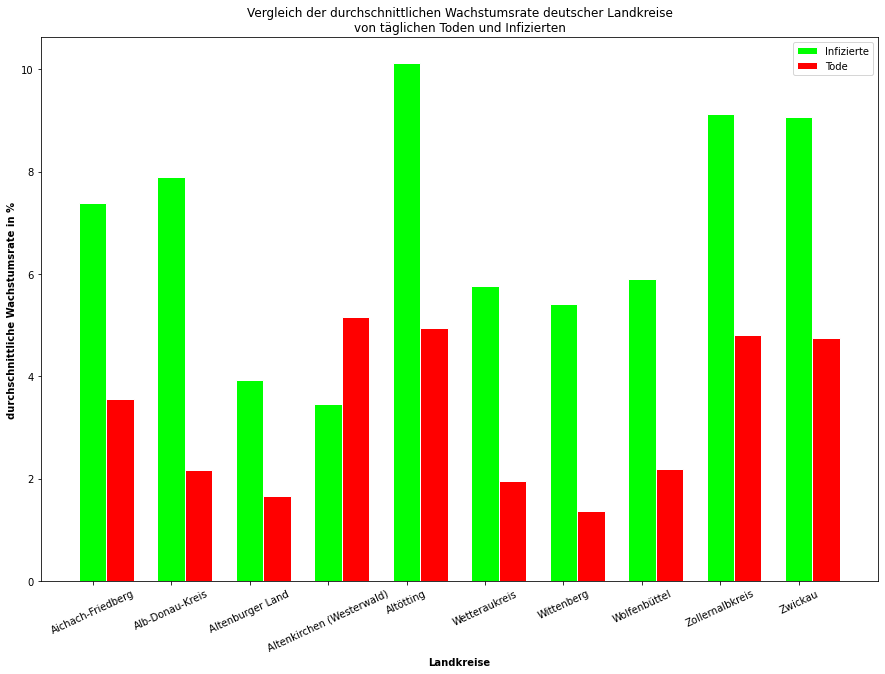

In [6]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLKbar = pd.DataFrame()
compLK = compLK.loc[compLK['Landkreise/Kreis'] != 'Würzburg']
compLKbar = compLK.iloc[:5]
compLKbar = compLKbar.append(compLK.tail(5))
#compLKbar.plot(kind='bar', x = 'Landkreise/Kreis', y= 'AGR', ax=ax,label='durchschnittliche Wachstumsrate')

labels = compLKbar['Landkreise/Kreis']
width = 0.35  # the width of the bars
bars1 = compLKbar['AGR']
bars2 = compLKbar['AGR_D']
 
# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + 0.35 for x in r1]

plt.bar(r1, bars1, color='#00ff00', width=0.35, edgecolor='white', label='Infizierte')
plt.bar(r2, bars2, color='#ff0000', width=0.35, edgecolor='white', label='Tode')

plt.title('Vergleich der durchschnittlichen Wachstumsrate deutscher Landkreise\nvon täglichen Toden und Infizierten')
plt.xlabel('Landkreise', fontweight='bold')
plt.ylabel('durchschnittliche Wachstumsrate in %', fontweight='bold')
ax.set_xticklabels(labels)
ax.set_xticks(r1)
plt.xticks(rotation = 25)

plt.legend()
plt.show()

Nun wurden 10 zufällig ausgewählte deutsche Landkreise, mithilfe eines Säulendiagramms, verglichen. Bei den ausgewählten Landkreisen sieht man, dass die tägliche Wachstumsrate der Infizierten und Tode sich ähneln und es keinen wirklichen Ausreißer gibt.

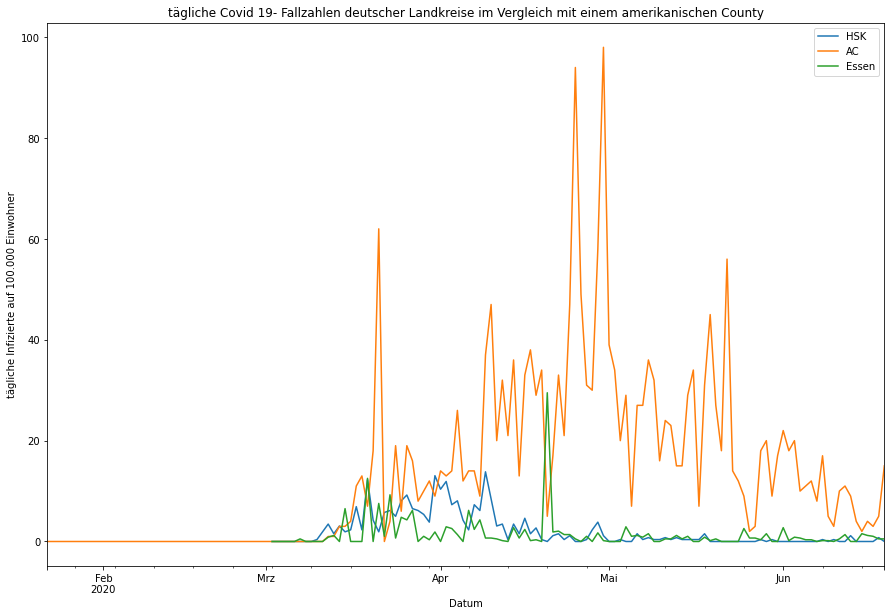

In [7]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte auf 100.000 Einwohner')

plt.show()

Mithilfe eines Liniendiagramms wurden die täglichen Covid 19 Fallzahlen auf 100.000 Einwohner visualisiert. Hier wurden der Hochsauerlandkreis und Essen als deutsche Beispiele genutzt und das Albany County als amerikanisches Beispiel. Das Albany County ist ein, im Staat New York liegendes ländliche County. Die Datenerhebung fängt erst Anfang März richtig an. Dort kann man sehen, dass die Kurven von Essen und dem HSK sehr ähnlich verlaufen, nur dass Essen Ende März und der HSK erst Anfang April einen Corona Ausbruch hatten. Die Zahlen vom Albany County sind im Vergleich sehr hoch. Dies könnte möglicherweise darauf zurückführen, dass sie durch die Aufnahme von Infizierten, New York City entlastet haben. Da zu diesen Zeitpunkt New York City der größte Herd in den USA war. 

Text(0, 0.5, 'tägliche Todeszahlen auf 100.000 Einwohner')

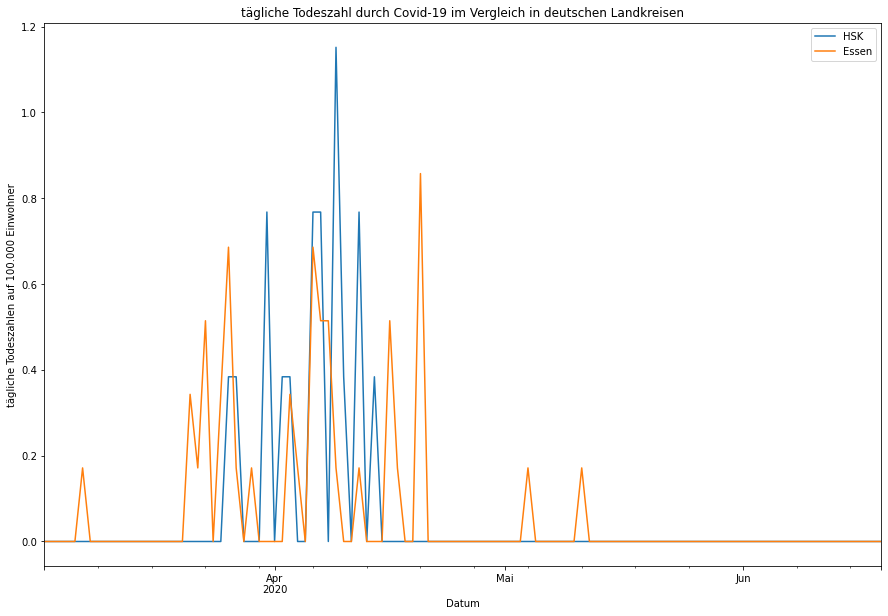

In [8]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl durch Covid-19 im Vergleich in deutschen Landkreisen')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen auf 100.000 Einwohner')

Auch die täglichen Tode auf 100.000 Einwohner wurden für den HSK und Essen visualisiert. Dies war für das Albany County nicht möglich, da die herangezogenen Daten keine Todesopfer beinhalteten. Man kann sehen, dass die herangezogenen Daten vergleichbar sind und es bei beiden Landkreisen hin und wieder nur ein paar Todesmeldungen gab.

(-0.6910449999999998, 50.0)

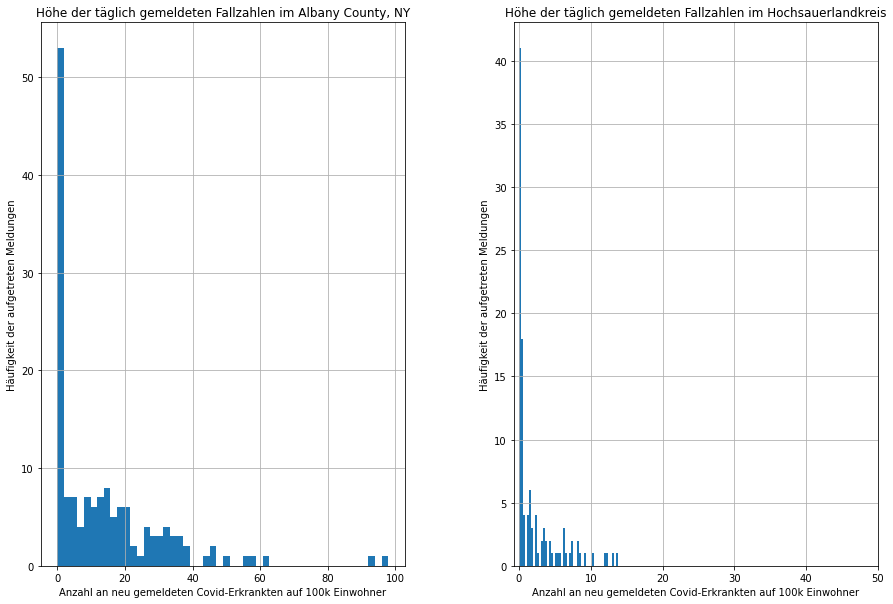

In [9]:
fig, ax = plt.subplots(1, 2,figsize = (15, 10))

dic['Albany County'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im Albany County, NY')

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')
ax[1].set_xlim(right = 50)

Als nächstes wurde mithilfe eines Histogramms gezeigt, dass die meisten täglichen Meldungen im Albany County und im Hochsauerlandkreis eine sehr geringe Anzahl an neuen Infizierten hatten. Außerdem zeigt der Vergleich, dass im Albany County täglich höhere neue Fallzahlen gemeldet wurden als im HSK. Wobei es im HSK maximal zu Tagen mit 15 neuen Fällen kam gibt es im Albany County schon Tage, an denen bis zu 40 neue Infizierte gemeldet wurden.

Text(0.5, 1.0, 'Verbindung zwischen Tag und Höhe der Meldungen')

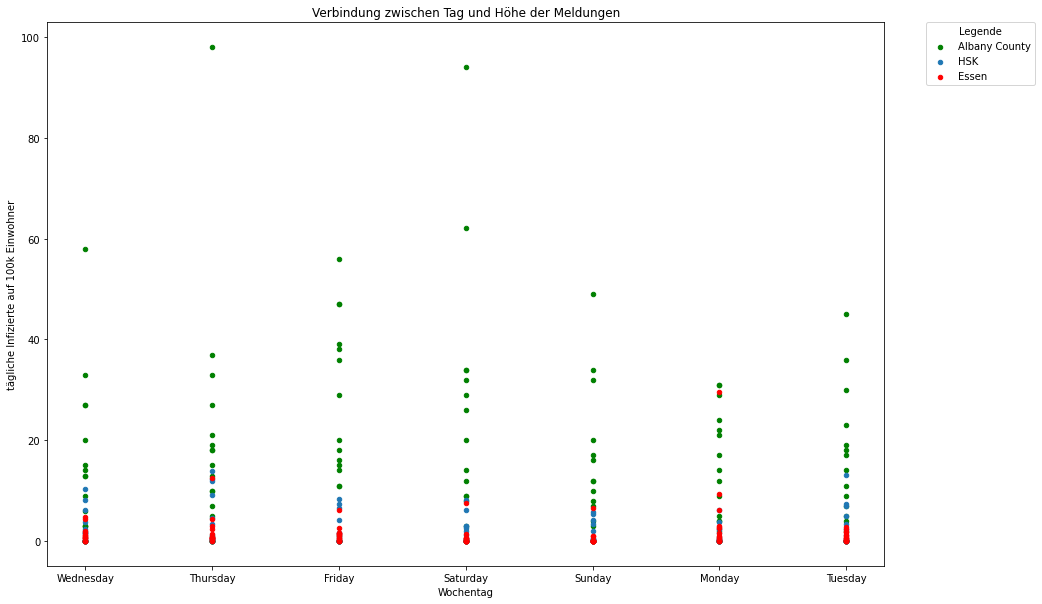

In [10]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
dic['Albany County'].plot(kind='scatter', x = 'Weekday', y= 'dailycases', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
ax.set_xlabel('Wochentag')
ax.set_ylabel('tägliche Infizierte auf 100k Einwohner')
ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Mithilfe eines Streudiagramms wurde versucht einen Zusammenhang zwischen den täglich gemeldeten Infizierten auf 100.000 Einwohner und dem gemeldeten Wochentag nachzuweisen. Hierfür wurden wieder der HSK, Essen und das Albany County herangezogen. Jedoch kann man aus dem Streudiagramm keinen Zusammenhand erkennen, da die Punkte sich an jedem Tag gleich verhalten.

In [11]:
import statsmodels.formula.api as smf

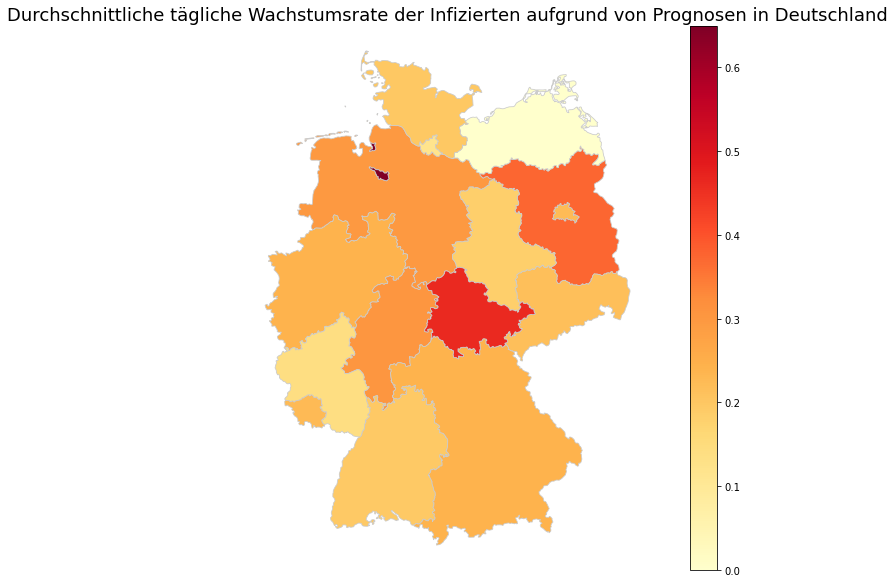

In [12]:
import geopandas as gpd

DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch Thüringen und Bremen im Vergleich sehr hohe. Die Prognosen wurden mithilfe von Linearer Regression und realen Daten, die bis zum 30.06 erhoben wurden, aufgestellt. Es ist kein Muster zwischen Ost und West oder regierenden Parteien erkennbar.

In [13]:
lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

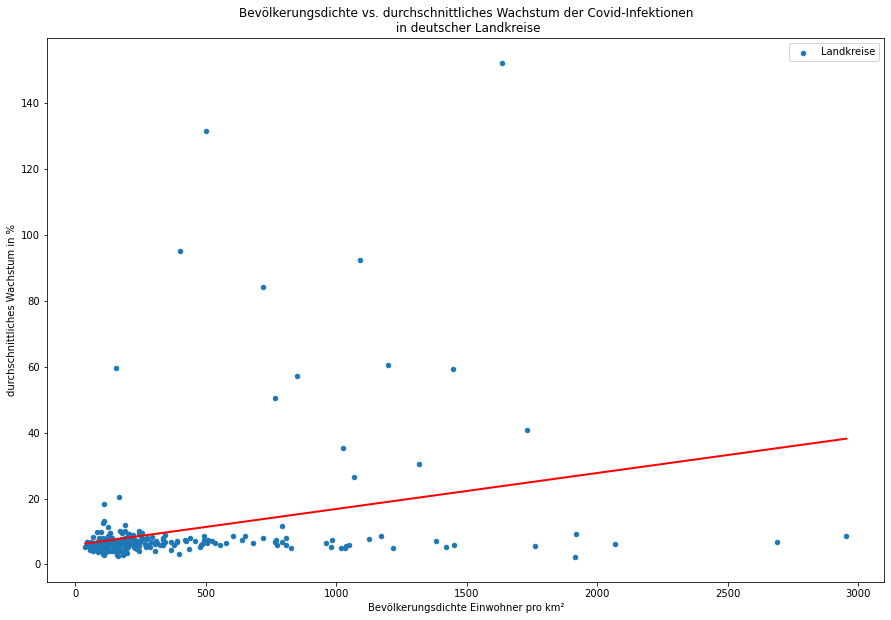

In [14]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")
plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen\n in deutscher Landkreise')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [15]:
print('p-Wert: \n',lm.pvalues)
compLKcorr = compLK.drop(columns=['Landkreise/Kreis'])
print('\nKorrelation: \n',compLKcorr.corr())
lm.summary()

p-Wert: 
 Intercept    8.555534e-07
Dichte       6.543334e-07
dtype: float64

Korrelation: 
                     AGR     AGR_D  Bev.D.Ew./km²
AGR            1.000000  0.494466       0.295578
AGR_D          0.494466  1.000000       0.196714
Bev.D.Ew./km²  0.295578  0.196714       1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGR   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     25.93
Date:                 Do, 25 Mrz 2021   Prob (F-statistic):           6.54e-07
Time:                        16:09:03   Log-Likelihood:                -1162.4
No. Observations:                 280   AIC:                             2329.
Df Residuals:                     278   BIC:                             2336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9295      1.177      5.036      0.000       3.612       8.247
Dichte         0.0109      0.002      5.092      0.000       0.007       0.015
==============================================================================
Omnibus:                      336.341   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16257.223
Skew:                           5.399   Prob(JB):                         0.00
Kurtosis:                      38.734   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 5,93+0,011x steigen. Der p-Wert ist sehr gering (0,008), das heißt dass die Beobachtungen die Hypothese, dass es einen Zusammenhang zwischen Bevölkerungsdichte und durchschnittlichen Wachstum der Coronazahlen, nicht unterstützen. Auch die Korrelation unterstützt diese Aussage

In [16]:
for j in range(10):    
    idx = DFCounty['Density'].idxmax()
    DFCounty = DFCounty.drop(idx)
    
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

Ab hier ist zu beachten, dass die Daten der Counties viele Ausreißer haben und damit die grafische Darstellung etwas verzerrt ist und auch das Clustering nicht richtig funktioniert.

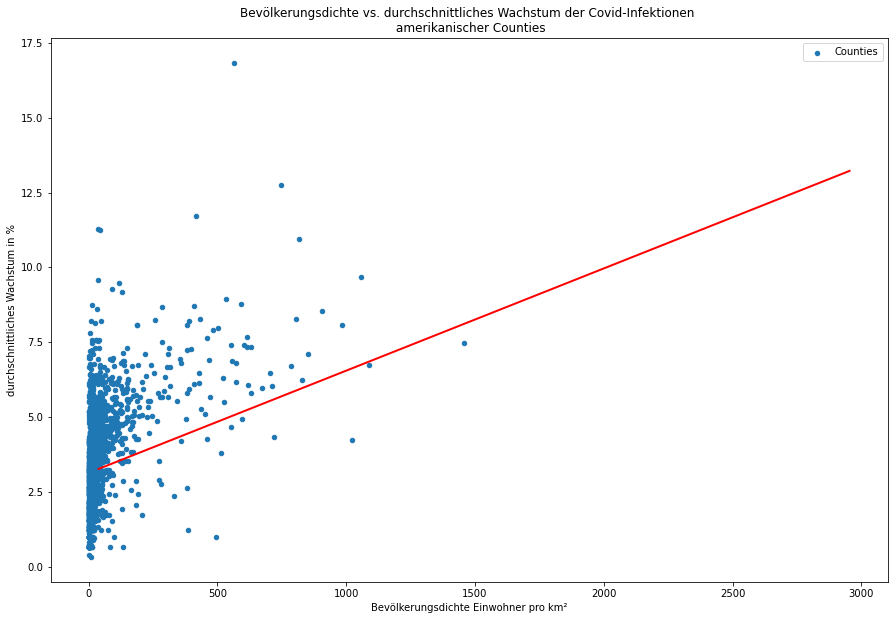

In [17]:
#Hiermit könnte man die 10 am meisten Bevölkerten Counties löschen, da sie das Streudiagramm 
# und die daurauffolgenden Analysen sehr stark bei der grafischen Darstellung beeinflussen

f, ax = plt.subplots(1, 1, figsize = (15, 10))
DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax,label="Counties")
plt.plot(trend, preds2, c='red', linewidth=2)
ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen \n amerikanischer Counties')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [18]:
lm2.params

Intercept    3.274893
Density      0.006821
dtype: float64

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [19]:
from sklearn.cluster import KMeans
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population','State'])
km = KMeans(n_clusters=4)
km.fit(DFCountyfnl)
y_km = km.predict(DFCountyfnl)

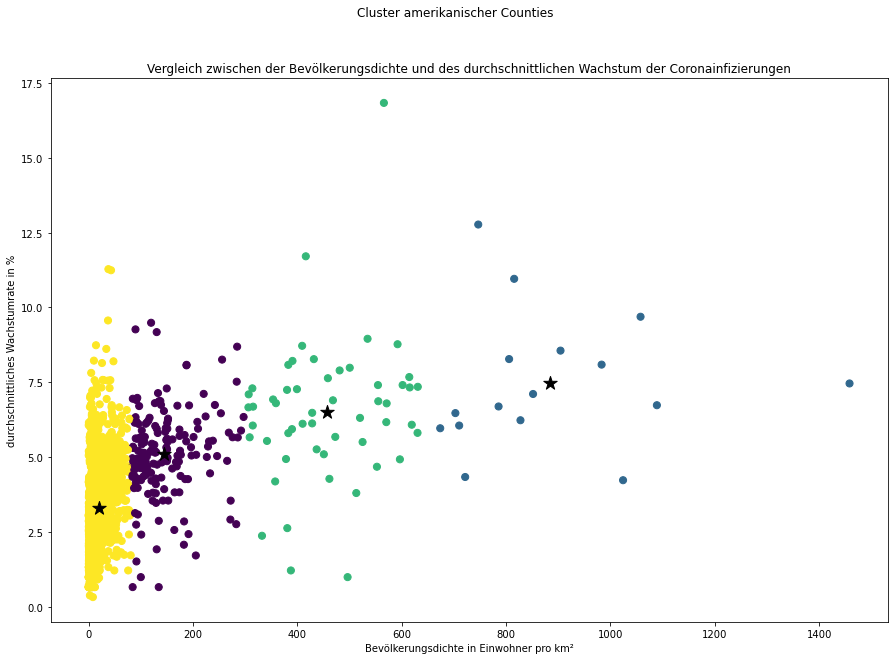

In [20]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyfnl["Density"], DFCountyfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster amerikanischer Counties")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Cluster des zuvor erstellen Streudiagramms mit 4 Center. Wie man sieht geben die Daten zum Clustern nicht viel her. Es entstehen keine Gruppierungen sondern, dieser Datensatz ist mehr 1 großes Cluster.

In [21]:
group_state = DFCounty[['AGR','Density','State']].groupby('State')
mean_group_state = group_state.agg(['mean'])
#group_value = group_value.merge(sum_group_state, left_on='State', right_index=True

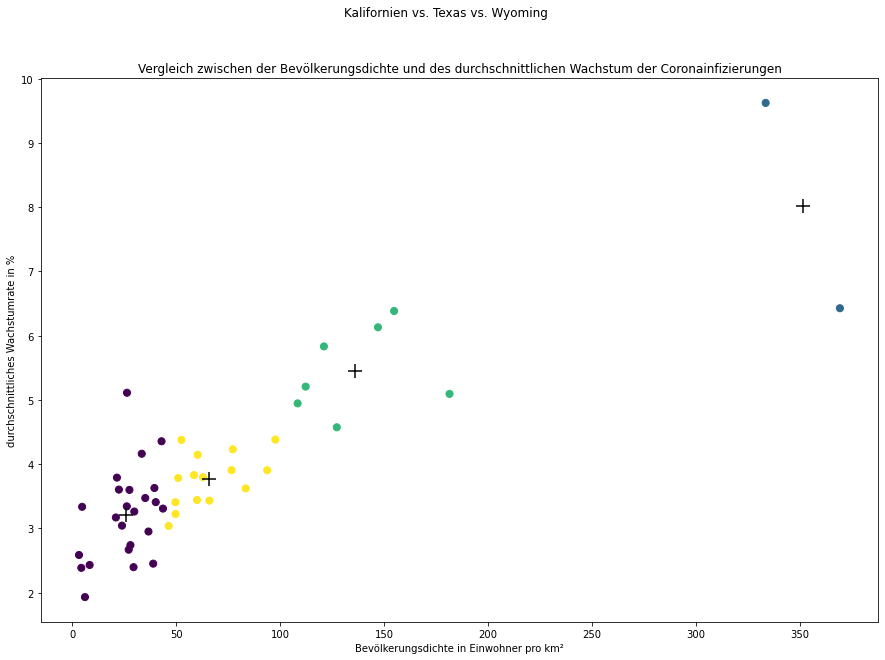

In [22]:
#mean_group_state = mean_group_state.drop(columns=["(AGR, count)"])
km = KMeans(n_clusters=4)
km.fit(mean_group_state)
y_km = km.predict(mean_group_state)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(mean_group_state["Density"], mean_group_state['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='+',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Kalifornien vs. Texas vs. Wyoming")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

In [23]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [24]:
neigh = pd.DataFrame()
DFCountyfnl = DFCountyfnl.fillna(0)
neigh = DFCountyfnl
neigh['Typ'] = 0
neigh = neigh.rename(columns={'Density':'Dichte'})
neighDE = pd.DataFrame()
neighDE = compLKfnl
neighDE['Typ'] = 1
neigh = neigh.append(neighDE)

In [25]:
y = neigh['Typ'].to_numpy()
X = neigh[['AGR','Dichte']].to_numpy()

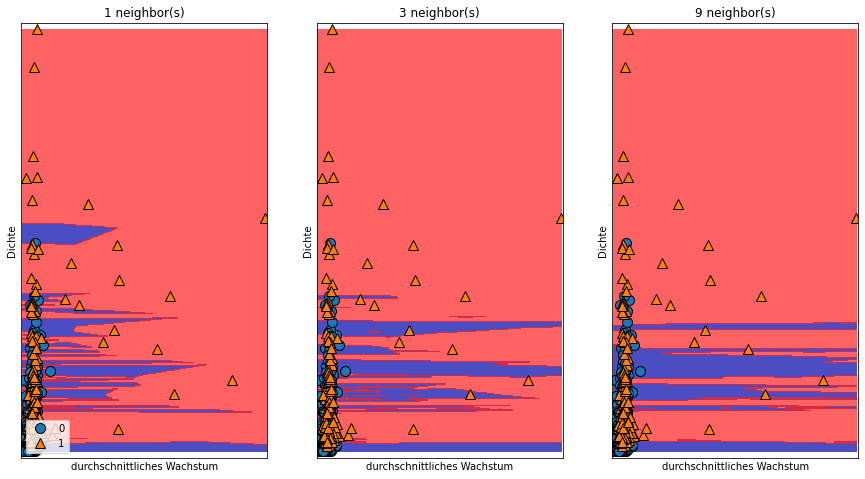

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(15,8))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("durchschnittliches Wachstum")
    ax.set_ylabel("Dichte")
    
axes[0].legend(loc=3)
plt.show()

In [27]:
print("Test set score: {:.5f}".format(score))

Test set score: 0.88723


Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hier kam ein Score von 0.88723 für die Testdaten heraus. Dieser Wert ist nicht schlecht, was aber auch daran liegen kann, dass auf jeden Landkreis acht Counties kommen und hier somit ein Ungleichgewicht vorherrscht.

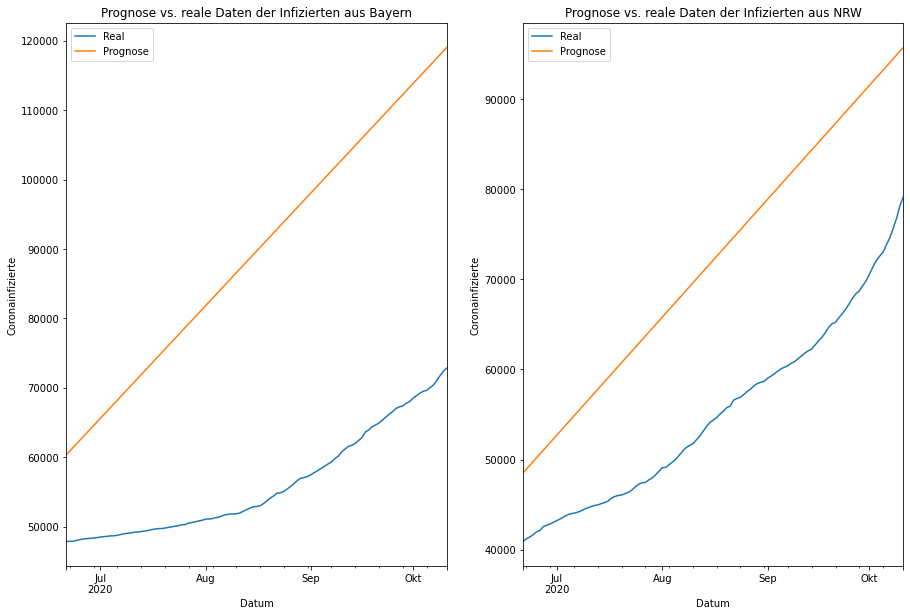

In [28]:
import statsmodels.formula.api as smf

lmBY = smf.ols(formula='BY ~ datef', data=bundzuwachsraw_1).fit()
predBY = lmBY.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictionBY'] = predBY

lmNW = smf.ols(formula='NW ~ datef', data=bundzuwachsraw_1).fit()
predNW = lmNW.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictionNW'] = predNW

f, ax = plt.subplots(1, 2, figsize = (15, 10))

bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'BY', ax=ax[0], label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictionBY', ax=ax[0], label="Prognose")
ax[0].set_title('Prognose vs. reale Daten der Infizierten aus Bayern')
ax[0].set_xlabel('Datum')
ax[0].set_ylabel('Coronainfizierte')

bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'NW', ax=ax[1], label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictionNW', ax=ax[1], label="Prognose")
ax[1].set_title('Prognose vs. reale Daten der Infizierten aus NRW')
ax[1].set_xlabel('Datum')
ax[1].set_ylabel('Coronainfizierte')

plt.show()

Als nächstes werden NRW und Bayern miteinander verglichen. Mithilfe der Prognosen und den dazugehörigen realen Daten wurden Liniendiagramme gebildet um die Daten miteinander zu vergleichen. Aus der Grafik kann man herauslesen, dass beide Bundesländer unter den Prognosen liegen, jedoch liegen die realen Daten von Bayern viel mehr unter den von NRW, da die Fläche zwischen den realen und den prognostizierten Daten in Bayern viel größer ist. Dies lässt sich auch mithilfe des Integrals bestimmen, dazu fehlt aber die Funktionsgleichung der realen Daten. Hieraus kann man schließen, dass die Maßnahmen, die ab dem 20.06 von Markus Söder in Bayern ergriffenen wurden, viel erfolgreicher waren, als die Maßnahmen die Armin Laschet für das Land NRW getroffen hat. 

HSK:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       167.061921         4.467339
std         87.345952         2.845373
min          0.000000         0.000000
25%         95.402600         0.767800
50%        216.527500         6.526500
75%        233.035800         6.526500
max        236.491000         6.526500

Köln:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       166.995412         6.802715
std         78.902228         3.643643
min          0.736900         0.000000
25%        122.413550         3.983725
50%        206.371400         9.026700
75%        225.392000         9.303100
max        236.168800         9.579400


(-0.5618650000000002, 15.0)

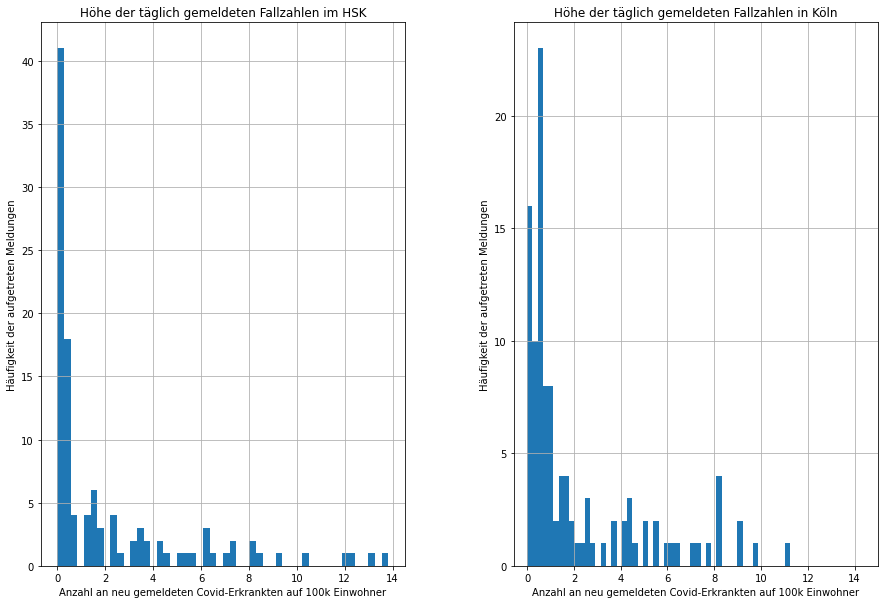

In [29]:
print("HSK:\n",d['Hochsauerlandkreis'][['cases_per_100k','deaths_per_100k']].describe())
print("\nKöln:\n",d['Köln'][['cases_per_100k','deaths_per_100k']].describe())

fig, ax = plt.subplots(1, 2,figsize = (15, 10))

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im HSK')

d['Köln'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen in Köln')
ax[1].set_xlim(right = 15)

Als letztes wurde der Hochsauerlandkreis mit Köln, in Punkten der täglichen Infizierten und Tode auf 100.000 Einwohner bis zum 20.06, verglichen. Die reinen Daten ähneln sich sehr. Mithilfe von Histogrammen zeigten sich auch hier gewisse Ähnlichkeiten, damit lassen sich keine Rückschlüsse auf den Unterschied zwischen ländlichen und urbanen Landkreisen ziehen. 